# Online Shopper's Intention Analysis

## Table of Contents

- Decription 
    - Dataset nature and origin
    - Basic dataset overview
    - Columns description
- Additional infor + errors
    - Check for nulls
    - Problematic rows
- Exploration analysis
    - Correlation heatmap
    - Purchasing trends
        

In [1]:
# initial libraries import

# for basic operations
import numpy as np
import pandas as pd

# warnings
import warnings
warnings.filterwarnings('ignore')

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
# dataset load

df = pd.read_csv('data/online_shoppers_intention.csv', delimiter=',')

# - - - - - - - - - - - - - - - - - - - - - - - - - - -- - -
# Description 🔎

## Dataset nature and origin 👣

This dataset is called *Online Shopper's Intention* and comes from *kaggle.com* website.

https://www.kaggle.com/roshansharma/online-shoppers-intention

The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session 
would belong to a different user in a 1-year period to avoid 
any tendency to a specific campaign, special day, user 
profile, or period.

## Basic dataset overview

In [3]:
df.shape

(12330, 18)

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Columns description 📄

**Revenue:**<br>Target value statingwhether cosumer purchaed something or not

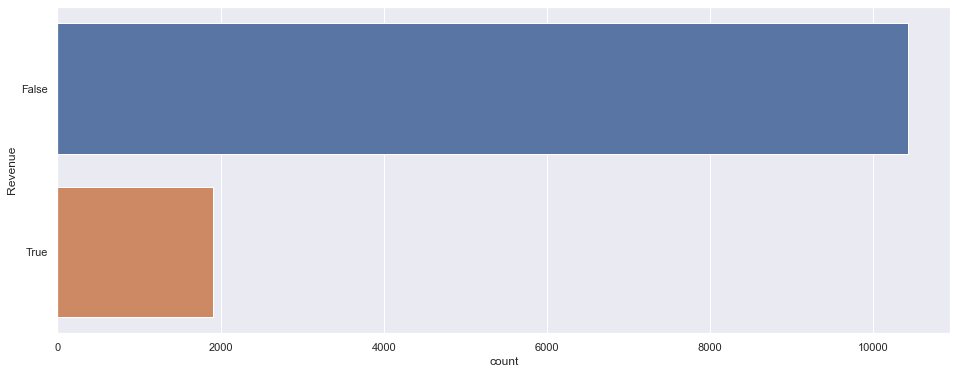

In [6]:
plt.figure(figsize=(16,6))
sns.countplot(y="Revenue", data=df)

**Administrative, Informational, Product Related:**<br>Types of pages visited in one session

(0.0, 200.0)

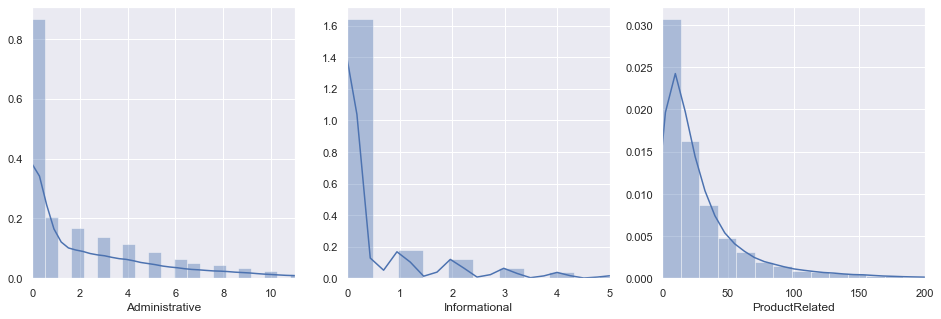

In [7]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(16,5))

ad_chart = sns.distplot(df["Administrative"], ax=axis1)
ad_chart.set_xlim(0,11)

inf_chart = sns.distplot(df["Informational"], ax=axis2)
inf_chart.set_xlim(0,5)

pr_chart = sns.distplot(df["ProductRelated"], ax=axis3)
pr_chart.set_xlim(0,200)

**Administrative Duration, Informational Duration, Product Related Duration:**<br>How much time did user spend on this type of page. Sums of all pages under this type.

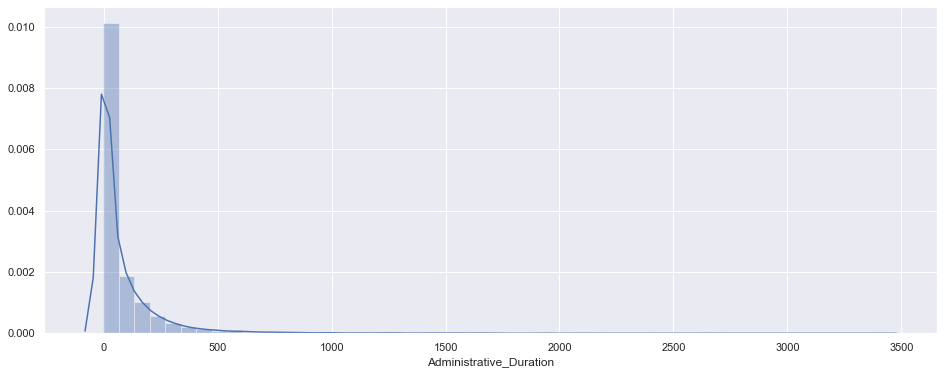

In [8]:
plt.figure(figsize=(16,6))
ad_chart = sns.distplot(df['Administrative_Duration'])

**Bounce Rate:**<br>Bounce rate is the percentage of single page visits (or web sessions).
It is the percentage of visits in which a person leaves your website from the landing page without browsing any further.

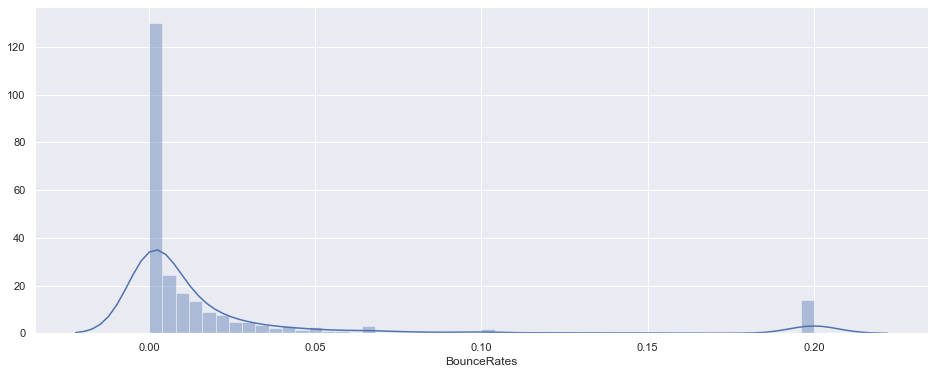

In [9]:
plt.figure(figsize=(16,6))
ad_chart = sns.distplot(df['BounceRates'])

**Exit Rate:**<br>Indicates how often visitors exit from website after visiting any number of pages on the site.

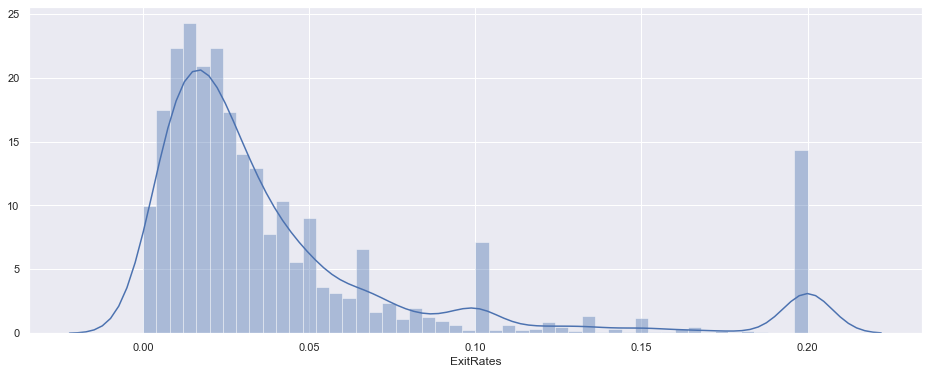

In [10]:
plt.figure(figsize=(16,6))
ad_chart = sns.distplot(df['ExitRates'])

**Page Value:**<br>Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both).

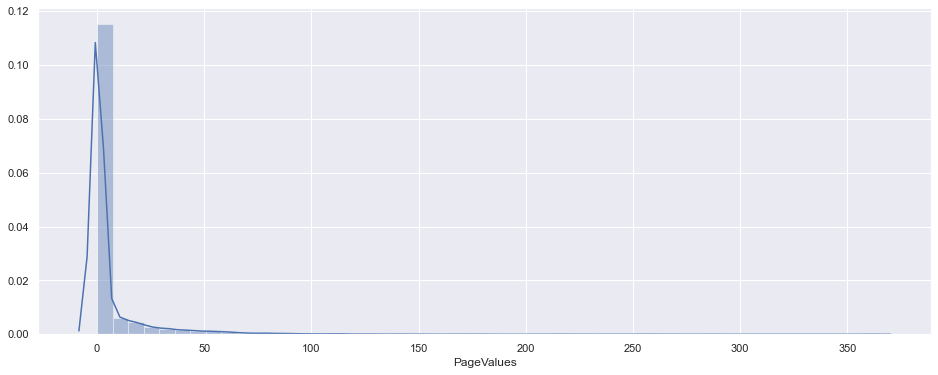

In [11]:
plt.figure(figsize=(16,6))
ad_chart = sns.distplot(df['PageValues'])

**Special Day:**<br>Indicates closeness to a special day (e.g. Mother's Day, Valentine's Day)

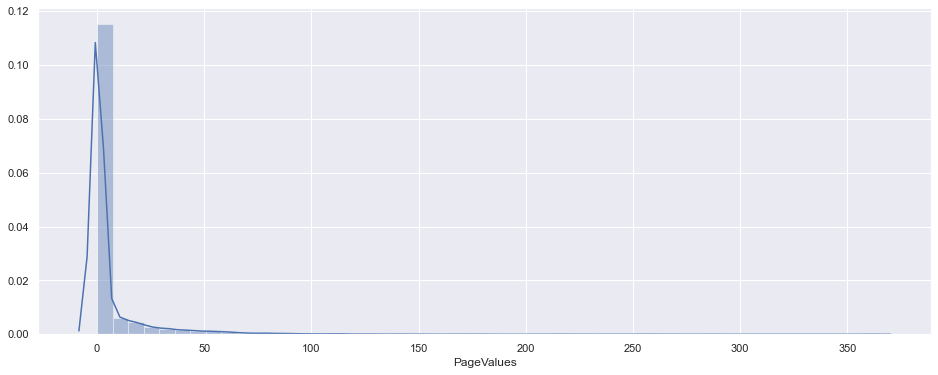

In [12]:
plt.figure(figsize=(16,6))
ad_chart = sns.distplot(df['PageValues'])

**Operating Systems:**<br>Unspecified different internet operating systems

[Text(0.5, 0, "['System 1', 'System 2', 'System 3', 'System 4', 'System 5', 'System 6', 'System 7', 'System 8']")]

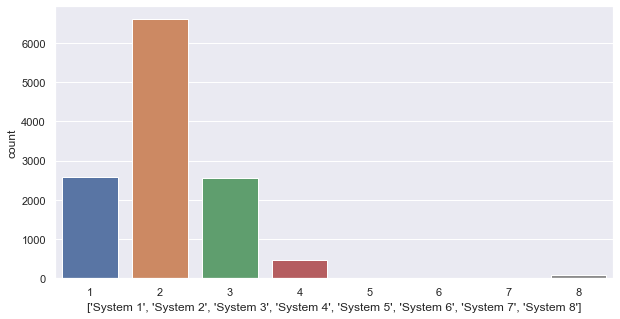

In [13]:
titles = []
for i in range(1,9):
    name = "System"
    name = name +" "+ str(i)
    titles.append(name)

    
plt.figure(figsize=(10,5))
muj_graf = sns.countplot(df["OperatingSystems"])
muj_graf.set(xlabel=titles)


**Browser:**<br>Unspecified different internet browsers

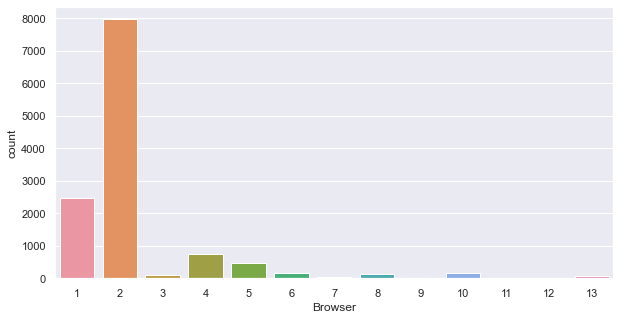

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(df["Browser"])

**Region:**<br>Unspecified different access regions

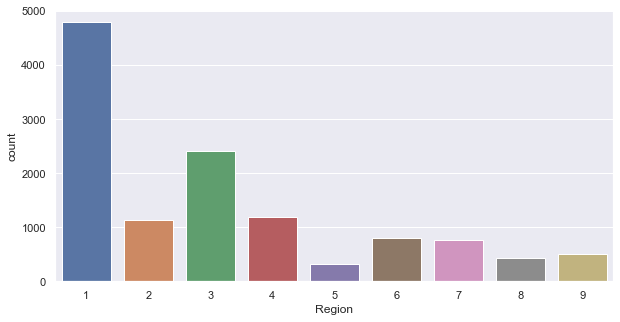

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(df["Region"])

**Traffic Type:**<br>?

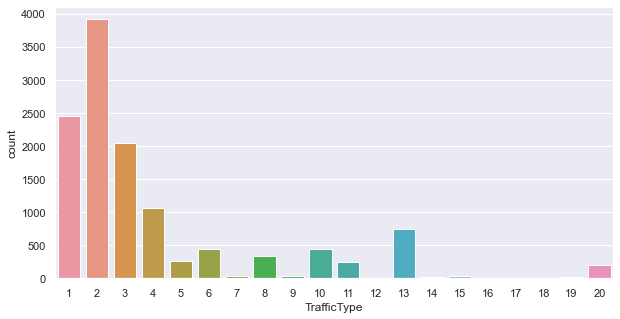

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(df["TrafficType"])

**Visitor type:**<br>New visitor, returning visitor, other

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


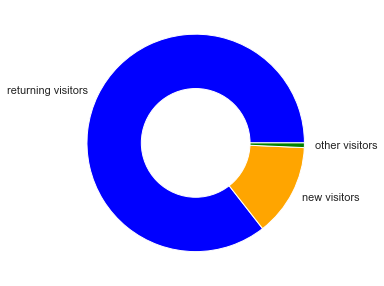

In [17]:
print(df['VisitorType'].value_counts())

# Individual visitor types definition
returning_visitors = df[df["VisitorType"] == "Returning_Visitor"].count()[1]
new_visitors = df[df["VisitorType"] == "New_Visitor"].count()[1]
other_visitors = df[df["VisitorType"] == "Other"].count()[1]


# Number of visitors
all_visitors_numbers = [returning_visitors, new_visitors, other_visitors]

# Labeling
all_labels = ["returning visitors", "new visitors", "other visitors"]

#Colors
all_colors= ["blue","orange","green"]


# Pie Chart construction

plt.figure(figsize=(10,5))
plt.pie(all_visitors_numbers, labels=all_labels, colors=all_colors)
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

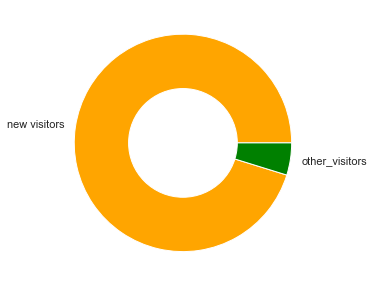

In [18]:
# Visitor numbers
some_visitors_numbers = [new_visitors, other_visitors]

# Labels
some_labels = ["new visitors", "other_visitors"]

# Colors
some_colors= ["orange","green"]


# Chart construction
plt.figure(figsize=(10,5))
plt.pie(some_visitors_numbers, labels=some_labels, colors=some_colors)
my_circle=plt.Circle( (0,0), 0.5, color='white')
p2=plt.gcf()
p2.gca().add_artist(my_circle)

**Weekend:**<br>Indicates if session was established during the weekend or not

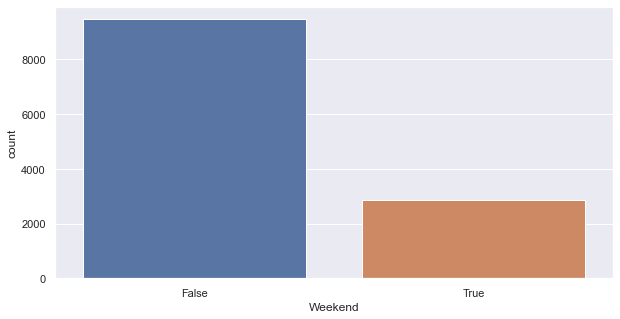

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(df["Weekend"])

## Additional info + errors 💥

### Check for nulls

In [20]:
print(df.isnull().sum()) 

print("----------------- In % --------------")

missing_percentage = df.isnull().sum()/df.shape[0]
print(missing_percentage)

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
----------------- In % --------------
Administrative             0.001135
Administrative_Duration    0.001135
Informational              0.001135
Informational_Duration     0.001135
ProductRelated             0.001135
ProductRelated_Duration    0.001135
BounceRates                0.001135
ExitRates                  0.001135
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSyst

### Problematic rows

In [21]:
# Rows with negative duration

print('Problematic Rows Count:',df[df['Informational_Duration'] < 0].count()[1])

Problematic Rows Count: 33


## Correlation heatmap

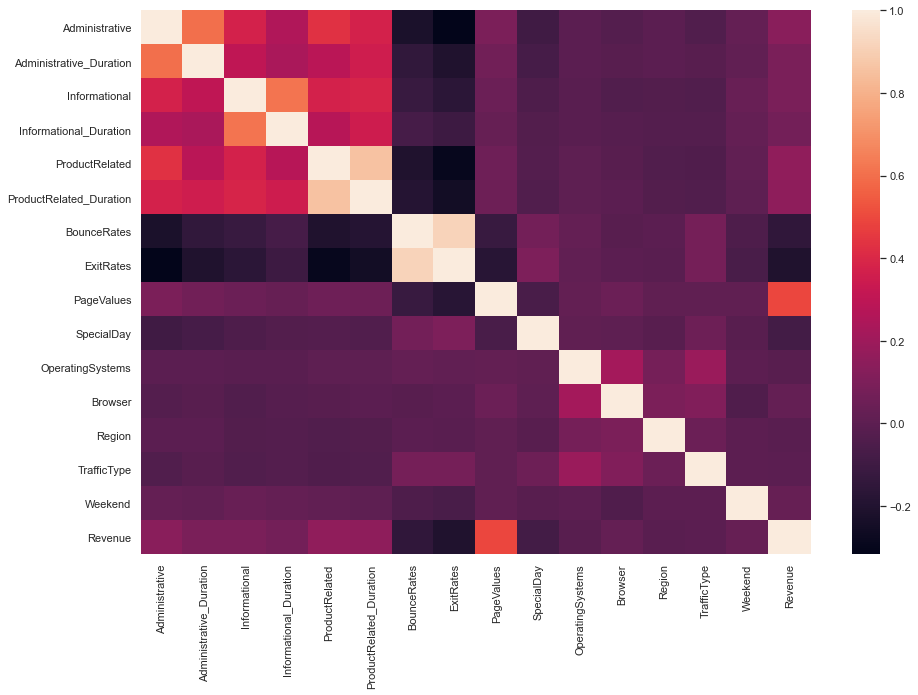

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

## Purchase trends

Number of sessions throughout the year

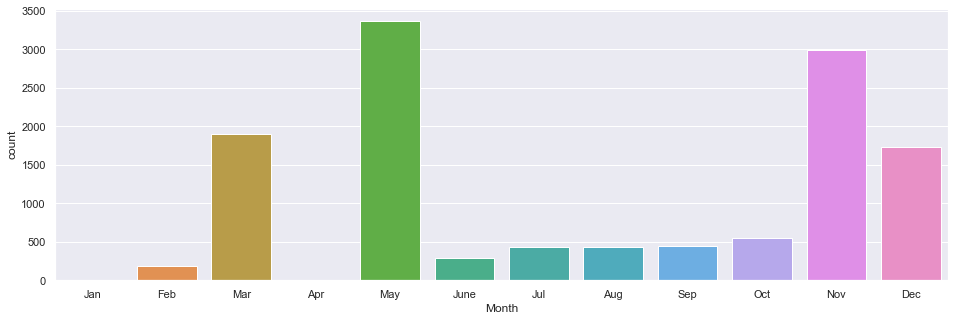

In [23]:
plt.figure(figsize=(16,5))
sns.countplot(x="Month", data=df, order=['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])